# Convolutional Neural Network

___

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span><ul class="toc-item"><li><span><a href="#Assign-each-folder-of-image-data-to-variables" data-toc-modified-id="Assign-each-folder-of-image-data-to-variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Assign each folder of image data to variables</a></span></li><li><span><a href="#Assign-images-and-assign-labels-to-variables" data-toc-modified-id="Assign-images-and-assign-labels-to-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Assign images and assign labels to variables</a></span></li></ul></li><li><span><a href="#Examine-Data" data-toc-modified-id="Examine-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Data</a></span><ul class="toc-item"><li><span><a href="#Examine-sample-image-of-cracked-concrete" data-toc-modified-id="Examine-sample-image-of-cracked-concrete-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Examine sample image of cracked concrete</a></span></li><li><span><a href="#Examine-sample-image-of-not-cracked-concrete" data-toc-modified-id="Examine-sample-image-of-not-cracked-concrete-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Examine sample image of not cracked concrete</a></span></li></ul></li><li><span><a href="#Image-Preprocessing" data-toc-modified-id="Image-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Image Preprocessing</a></span></li><li><span><a href="#Base-Convolutional-Neural-Network" data-toc-modified-id="Base-Convolutional-Neural-Network-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Base Convolutional Neural Network</a></span></li></ul></div>

___

## Setup

In [1]:
# Import necessary python packages and functions

from __future__ import print_function
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import math
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from wordcloud import WordCloud
import random
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LassoCV, Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score, precision_recall_curve, precision_recall_fscore_support
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from pprint import pprint
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model, Input, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras import backend, layers, models
from PIL import Image
import imageio
import os
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [32]:
#Expanding max range in Pandas (common practice)
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

In [3]:
# This is to avoid getting hundreds of log messages
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

___

## Import Data

### Assign each folder of image data to variables

- The ImageDataGenerator class has three methods to read images from a numpy array or folders containing images:
    - flow()
    - flow_from_directory()
    - flow_from_dataframe() 

In [4]:
# Get all the data in the directory, and reshape images.
# NOTE: images are already a consistent size - 227 x 227
# Multiply every value by 1/255 (this is scaling the data on a scale between 0-1)

data_train = ImageDataGenerator(rescale=1/255).flow_from_directory( 
    '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Train',
    target_size=(256, 256), #squish images down to this size (images are already this size)
    batch_size=30000, #we want batch size to be all of the images in the folder
    shuffle=True,
    seed=123)

data_validation = ImageDataGenerator(rescale=1/255).flow_from_directory( 
    '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Validation',
    target_size=(256, 256),
    batch_size=5000, 
    shuffle=True,
    seed=123)

data_test = ImageDataGenerator(rescale=1/255).flow_from_directory( 
    '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Test',
    target_size=(256, 256),
    batch_size=5000,
    shuffle=True,
    seed=123)

Found 30000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


### Assign images and assign labels to variables

In [5]:
# Split images and labels...it is randomized.

images_train, labels_train = next(data_train)
images_validation, labels_validation = next(data_validation)
images_test, labels_test = next(data_test)

In [6]:
# Check image and label shape.
# Each image should now be reshaped into 256 pixels x 256 pixels x 3 colors (RGB).

print('TRAIN')
print('Images Shape', images_train.shape) #(30,000, 256, 256, 3)
print('Labels Shape', labels_train.shape) #(30,000, 2)
print('VALIDATION')
print('Images Shape', images_validation.shape) #(5,000, 256, 256, 3)
print('Labels Shape', labels_validation.shape)#(5,000, 2)
print('TEST')
print('Images Shape', images_test.shape) #(5,000, 256, 256, 3)
print('Labels Shape', labels_test.shape) #(5,000, 2)

TRAIN
Images Shape (30000, 256, 256, 3)
Labels Shape (30000, 2)
VALIDATION
Images Shape (5000, 256, 256, 3)
Labels Shape (5000, 2)
TEST
Images Shape (5000, 256, 256, 3)
Labels Shape (5000, 2)


___

## Examine Data

### Examine sample image of cracked concrete

(1, 256, 256, 3)


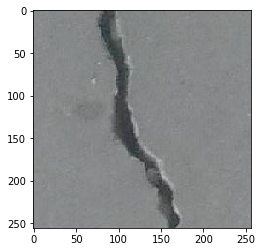

In [7]:
img_path = '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Train/Cracked/00001.jpg'

img_1 = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img_1)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

### Examine sample image of not cracked concrete

(1, 256, 256, 3)


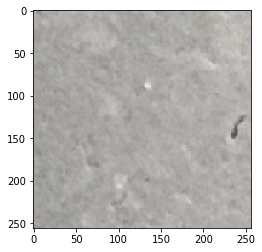

In [8]:
img_path = '/Users/alexandercheng/Desktop/code/projects/crack-detection-data/Data/Train/Not Cracked/00001.jpg'

img_2 = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img_2)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

___

## Image Preprocessing

**NO IMAGE PREPROCESSING REQUIRED FOR THIS DATASET.**

___

## Base Convolutional Neural Network

In [16]:
cnn_1 = models.Sequential()
cnn_1.add(layers.Conv2D(64, (3, 3), #64 different filters, with a 3x3 filter.
                      activation='relu', #use ReLu activation functions throughout, save sigmoid / softmax function for the end layer.
                      input_shape=(256, 256,  3), #image shape input
                      padding='SAME')) #"valid" means no padding, and "same" means with padding.

# 64 bias parameters.
# 64 * (3 * 3 * 3) weight parametrs.
# Output is 64*256*256.

cnn_1.add(layers.MaxPooling2D((2, 2))) #(2,2) reduces dimensionality of image by half.

# Output is 64*128*128.
# 32 nodes in this layer...no padding here.

cnn_1.add(layers.Conv2D(32, (3, 3), activation='relu')) 

# 32 bias parameters.
# 32 * (3*3*64).
# Output is 32*128*128.

cnn_1.add(layers.MaxPooling2D((2, 2))) 

# Output is 32*64*64.

cnn_1.add(layers.Flatten())

#32 x 64 x 64 = 131,072 features.

cnn_1.add(layers.Dense(32, activation='relu')) #dense fully connected layer.

cnn_1.add(layers.Dense(2, activation='softmax')) #softmax to ease decision-making.

cnn_1.compile(loss='binary_crossentropy',
            optimizer="sgd",
            metrics=['acc'])

In [17]:
#check to make sure your model is designed the way you want.
#note that "pooling" and "flatten" are NOT TRAINABLE. They are just dumb operations.
cnn_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 126, 126, 32)      18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4064288   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

**CALLBACKS**

In [18]:
saving_weights = keras.callbacks.ModelCheckpoint(
    'weights.{epoch:02d}-{val_loss:.2f}.hdf5', #save our output as we go through.
    monitor='val_loss', verbose=0, save_best_only=False, #for each epoch, give me the validation loss.
    save_weights_only=False, mode='auto', period=10)

reduce_lr = keras.callbacks.ReduceLROnPlateau( #lr = learning rate - we want a big step size up front to speed up the process, but smaller steps later on to ensure we don't overshoot the minimum)
    monitor='val_loss', factor=0.1, patience=20,
    verbose=0, mode='auto', min_delta=0.0001, min_lr=0)

nan_problem = keras.callbacks.TerminateOnNaN()

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20,
    verbose=0, mode='auto', baseline=None, restore_best_weights=False)

csv_logger = keras.callbacks.CSVLogger('training.log') #write information about my model to a file

In [51]:
#now the model is finally going to run.
#normally would want many more epochs than 2...but only 2 for the sake of time.

cnn_1a = cnn_1.fit(images_train,
               labels_train,
               epochs=20,
               batch_size=500,
               validation_data=(images_validation, labels_validation),
               callbacks=[csv_logger, early_stop, nan_problem, reduce_lr, saving_weights])

Train on 30000 samples, validate on 5000 samples
Epoch 1/20
30000/30000 [==============================] - 1201s 40ms/step - loss: 0.6193 - acc: 0.6605 - val_loss: 0.5865 - val_acc: 0.8096
Epoch 2/20
30000/30000 [==============================] - 1708s 57ms/step - loss: 0.5721 - acc: 0.6967 - val_loss: 0.5794 - val_acc: 0.6858
Epoch 3/20
30000/30000 [==============================] - 1210s 40ms/step - loss: 0.5282 - acc: 0.7461 - val_loss: 0.5481 - val_acc: 0.6320
Epoch 4/20
30000/30000 [==============================] - 1198s 40ms/step - loss: 0.4883 - acc: 0.7794 - val_loss: 0.5585 - val_acc: 0.7044
Epoch 5/20
30000/30000 [==============================] - 1189s 40ms/step - loss: 0.4639 - acc: 0.7913 - val_loss: 0.4220 - val_acc: 0.8218
Epoch 6/20
30000/30000 [==============================] - 1202s 40ms/step - loss: 0.4052 - acc: 0.8317 - val_loss: 0.5224 - val_acc: 0.6500
Epoch 7/20
30000/30000 [==============================] - 1191s 40ms/step - loss: 0.3875 - acc: 0.8368 - val_lo

In [ ]:
cnn_1.save("cnn_1.h5")
print("Saved model to disk")

In [75]:
hist_cnn_1a = cnn_1a.history
loss_values = hist_cnn_1a['loss']
val_loss_values = hist_cnn_1a['val_loss']
acc_values = hist_cnn_1a['acc']
val_acc_values = hist_cnn_1a['val_acc']
epochs = range(1, len(loss_values) + 1)

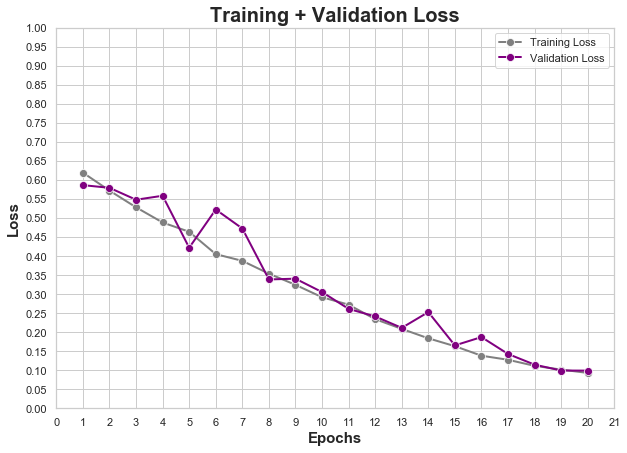

In [86]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, loss_values, label='Training Loss', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_loss_values, label='Validation Loss', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Loss', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Loss', size=15, weight='bold')
plt.axis([0,21,0,1])
plt.legend()
plt.show()
# plt.savefig('cnn_vanilla_tuned_loss.pdf')

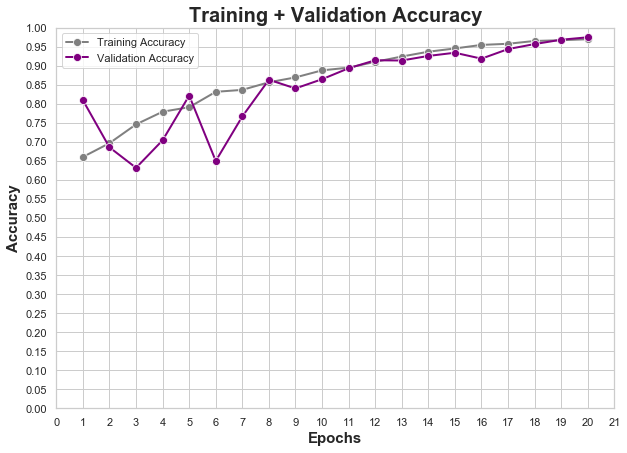

In [87]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, acc_values, label='Training Accuracy', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_acc_values, label='Validation Accuracy', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Accuracy', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Accuracy', size=15, weight='bold')
plt.axis([0,21,0,1])
plt.legend()
plt.show()
# plt.savefig('cnn_vanilla_tuned_accuracy.pdf')

In [82]:
predictions_1 = cnn_1.predict(images_validation)

In [83]:
predictions_1

array([[0.07980176, 0.9201982 ],
       [0.99815243, 0.00184753],
       [0.07563006, 0.92436993],
       ...,
       [0.9864977 , 0.01350229],
       [0.31854185, 0.6814581 ],
       [0.06091149, 0.9390885 ]], dtype=float32)